In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from skimage.io import imread


Data Understanding & Exploration

In [3]:
data = "data/Dataset.csv"  
df = pd.read_csv(data)

print("Data shape:", df.shape)
df.head()


Data shape: (128, 402)


,id,log-sigma-1-0-mm-3D_glrlm_GrayLevelNonUniformity,log-sigma-1-0-mm-3D_ngtdm_Coarseness,minor_axis_length,area,log-sigma-1-0-mm-3D_gldm_DependenceNonUniformity,log-sigma-2-0-mm-3D_ngtdm_Coarseness,log-sigma-2-0-mm-3D_gldm_DependenceNonUniformity,log-sigma-2-0-mm-3D_glrlm_GrayLevelNonUniformity,wavelet-H_ngtdm_Coarseness,...,wavelet-H_glcm_JointEntropy,wavelet-H_glrlm_GrayLevelNonUniformityNormalized,log-sigma-2-0-mm-3D_glrlm_GrayLevelNonUniformityNormalized,log-sigma-1-0-mm-3D_glrlm_HighGrayLevelRunEmphasis,log-sigma-2-0-mm-3D_glcm_MCC,LBP_hist_bin_7,log-sigma-1-0-mm-3D_gldm_HighGrayLevelEmphasis,unexplained_infertility,previous_miscarriages,label
0,1,4809.535706,0.000247,198.625804,34583,12731.61441,0.000467,13018.03444,2687.906126,0.000138,...,3.863600,0.275603,0.205812,110.158185,0.839618,0.054680,111.058150,0,0,0
1,2,4460.623751,0.000284,193.191790,32053,11900.13194,0.000526,11521.54435,2826.917297,0.000162,...,4.119202,0.252179,0.187636,72.062320,0.853366,0.063489,72.682151,0,0,0
2,3,4925.207181,0.000240,199.327172,34346,13081.91446,0.000431,13580.04041,2784.541071,0.000135,...,3.434695,0.314459,0.231505,56.084546,0.845357,0.060094,56.346329,0,0,0
3,4,4664.352654,0.000257,195.713530,34131,12645.47833,0.000490,12945.91348,2610.770111,0.000141,...,3.599379,0.297244,0.199265,72.034173,0.868814,0.058949,72.831414,0,0,0
4,5,4420.923359,0.000271,196.147021,32842,12027.18696,0.000530,11766.90250,2474.527556,0.000152,...,3.922065,0.272541,0.179913,72.190030,0.855325,0.061050,72.673284,0,0,0


In [27]:
id_col = df['id'].values
x = df.iloc[:, 1:-1].values   
y = df['label'].values              
print("Tabular features shape:", x.shape)
print("Labels shape:", y.shape)


Tabular features shape: (128, 400)
Labels shape: (128,)


In [28]:
id_col

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128])

In [13]:
x

array([[4.80953571e+03, 2.46799000e-04, 1.98625804e+02, ...,
        1.11058150e+02, 0.00000000e+00, 0.00000000e+00],
       [4.46062375e+03, 2.84052000e-04, 1.93191790e+02, ...,
        7.26821514e+01, 0.00000000e+00, 0.00000000e+00],
       [4.92520718e+03, 2.39712000e-04, 1.99327172e+02, ...,
        5.63463285e+01, 0.00000000e+00, 0.00000000e+00],
       ...,
       [5.20303805e+03, 2.39943000e-04, 2.29486021e+02, ...,
        7.29356186e+01, 0.00000000e+00, 1.00000000e+00],
       [5.36205847e+03, 2.34684000e-04, 2.27372063e+02, ...,
        1.10723695e+02, 1.00000000e+00, 0.00000000e+00],
       [4.71630042e+03, 2.68129000e-04, 1.87464402e+02, ...,
        7.26481092e+01, 1.00000000e+00, 0.00000000e+00]])

In [14]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [7]:
print("Missing values:", np.isnan(x).sum())
print("Infinite values:", np.isinf(x).sum())


Missing values: 0
Infinite values: 0


In [17]:
df.dtypes

id                                                    int64
log-sigma-1-0-mm-3D_glrlm_GrayLevelNonUniformity    float64
log-sigma-1-0-mm-3D_ngtdm_Coarseness                float64
minor_axis_length                                   float64
area                                                  int64
                                                     ...   
LBP_hist_bin_7                                      float64
log-sigma-1-0-mm-3D_gldm_HighGrayLevelEmphasis      float64
unexplained_infertility                               int64
previous_miscarriages                                 int64
label                                                 int64
Length: 402, dtype: object

In [20]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_rows', None)
df.describe()

,id,log-sigma-1-0-mm-3D_glrlm_GrayLevelNonUniformity,log-sigma-1-0-mm-3D_ngtdm_Coarseness,minor_axis_length,area,log-sigma-1-0-mm-3D_gldm_DependenceNonUniformity,log-sigma-2-0-mm-3D_ngtdm_Coarseness,log-sigma-2-0-mm-3D_gldm_DependenceNonUniformity,log-sigma-2-0-mm-3D_glrlm_GrayLevelNonUniformity,wavelet-H_ngtdm_Coarseness,...,wavelet-H_glcm_JointEntropy,wavelet-H_glrlm_GrayLevelNonUniformityNormalized,log-sigma-2-0-mm-3D_glrlm_GrayLevelNonUniformityNormalized,log-sigma-1-0-mm-3D_glrlm_HighGrayLevelRunEmphasis,log-sigma-2-0-mm-3D_glcm_MCC,LBP_hist_bin_7,log-sigma-1-0-mm-3D_gldm_HighGrayLevelEmphasis,unexplained_infertility,previous_miscarriages,label
count,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,...,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000
mean,64.500000,4624.770657,0.000273,203.736794,35077.242188,12957.961093,0.000499,12729.400554,2904.171441,0.000152,...,3.865529,0.274397,0.188203,80.496165,0.852512,0.064432,80.942224,0.421875,0.046875,0.468750
std,37.094474,483.157295,0.000037,14.765885,3559.738997,1338.926661,0.000067,1379.825697,327.717790,0.000020,...,0.381431,0.032455,0.018484,21.697374,0.013445,0.009279,21.893755,0.495799,0.212202,0.500983
min,1.000000,3368.150191,0.000216,173.453117,27586.000000,10172.773800,0.000382,10029.729360,2203.836345,0.000121,...,3.050273,0.188504,0.140413,42.202191,0.826322,0.042540,42.605741,0.000000,0.000000,0.000000
25%,32.750000,4434.173867,0.000247,196.569541,32944.000000,12085.657263,0.000455,11798.891503,2675.750495,0.000138,...,3.600144,0.251201,0.175707,72.093568,0.843202,0.057599,72.647997,0.000000,0.000000,0.000000
50%,64.500000,4664.489740,0.000265,200.193176,34207.500000,12655.016520,0.000489,12608.748020,2846.895784,0.000147,...,3.889000,0.271558,0.187024,72.667957,0.850368,0.063141,72.990232,0.000000,0.000000,0.000000
75%,96.250000,4945.040942,0.000281,217.304934,38431.500000,14183.806682,0.000523,13834.066105,3157.554761,0.000157,...,4.130718,0.297729,0.199808,90.388160,0.861442,0.070138,90.823095,1.000000,0.000000,1.000000
max,128.000000,5601.431538,0.000390,229.486021,42221.000000,15379.960900,0.000685,15525.799450,3592.559575,0.000212,...,5.048183,0.354467,0.238392,181.107419,0.893696,0.094577,183.230786,1.000000,1.000000,1.000000


In [ ]:
label_counts =df['label'].value_counts()
print("Label distribution:", label_counts)
#0-> Normal, 1-> abnormal

Label distribution: label
0    68
1    60
Name: count, dtype: int64


In [22]:
print("  Min value:", np.min(x))
print("  Max value:", np.max(x))
print("  Mean value:", np.mean(x))
print("  Std deviation:", np.std(x))

  Min value: -2403.38208
  Max value: 1270434068.0
  Mean value: 2897662.1257811673
  Std deviation: 44374312.66775538


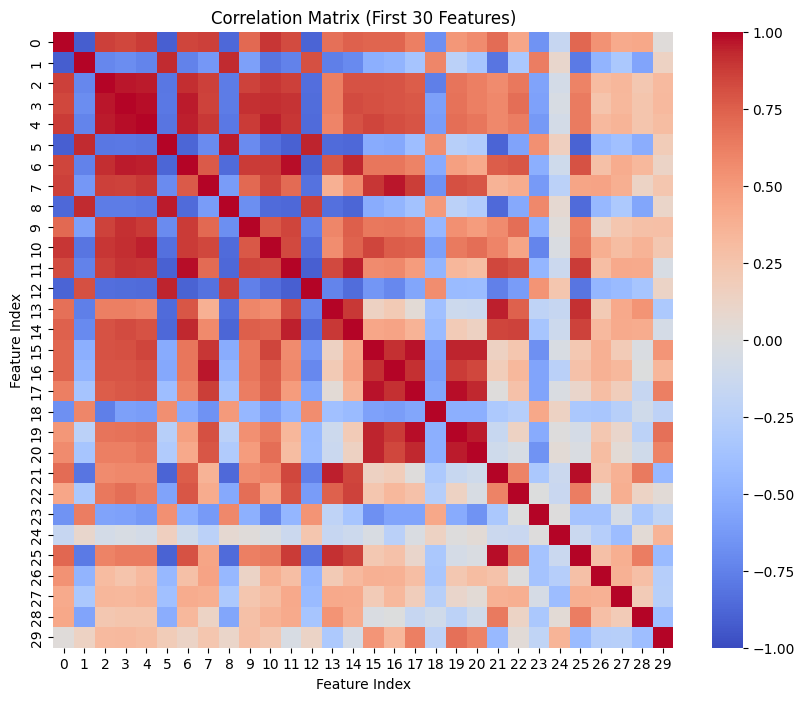

In [23]:
import seaborn as sns
corr_matrix = np.corrcoef(x[:, :30].T)

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False, vmin=-1, vmax=1)
plt.title("Correlation Matrix (First 30 Features)")
plt.xlabel("Feature Index")
plt.ylabel("Feature Index")
plt.show()


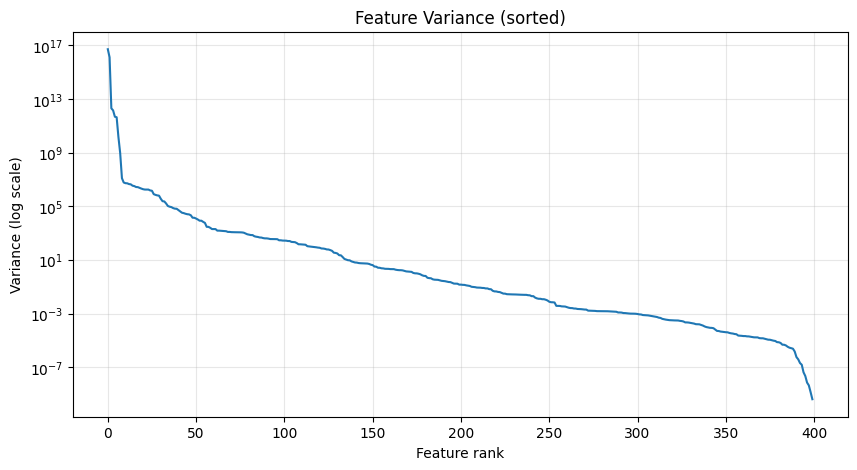

In [24]:
feature_vars = x.var(axis=0)
plt.figure(figsize=(10,5))
plt.plot(sorted(feature_vars, reverse=True))
plt.yscale('log')
plt.title("Feature Variance (sorted)")
plt.xlabel("Feature rank")
plt.ylabel("Variance (log scale)")
plt.grid(True, alpha=0.3)
plt.show()


load Images

In [47]:
image_dir = "data/images"  
image_size = (256, 256)

images = []

for img_id in df['id'].values:
    filename = f"{int(img_id):04d}.jpg"
    img_path = os.path.join(image_dir, filename)

    img = imread(img_path, as_gray=True)

    images.append(img)

images = np.array(images, dtype=np.float32)
images /= 255.0 

print("Images shape:", images.shape)


Images shape: (128, 256, 256)


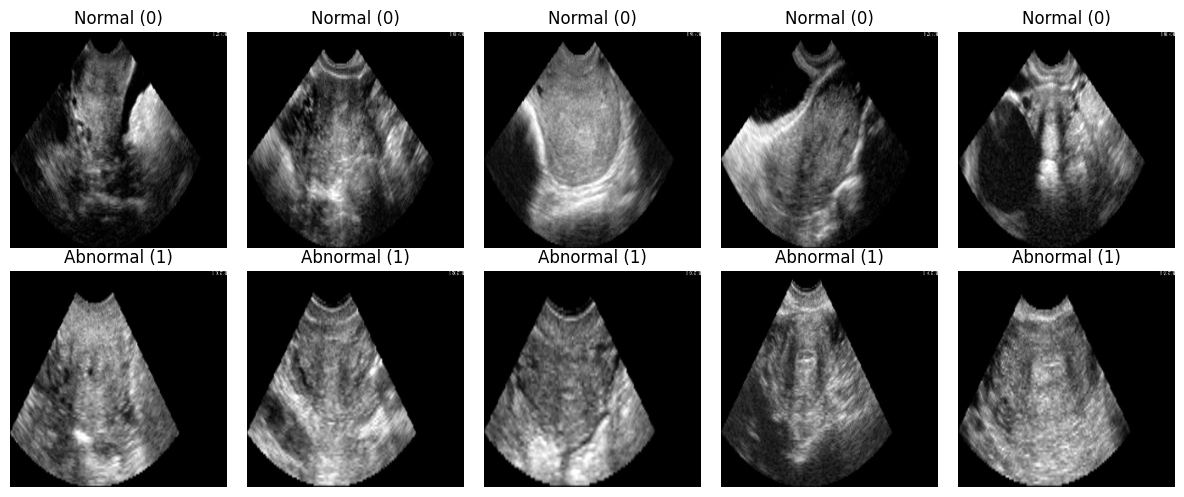

In [48]:
normal_images = images[y == 0]
abnormal_images = images[y == 1]

fig, axes = plt.subplots(2, 5, figsize=(12, 5))

for i in range(5):
    axes[0, i].imshow(normal_images[i], cmap='gray')
    axes[0, i].set_title("Normal (0)")
    axes[0, i].axis("off")

    axes[1, i].imshow(abnormal_images[i], cmap='gray')
    axes[1, i].set_title("Abnormal (1)")
    axes[1, i].axis("off")

plt.tight_layout()
plt.show()


Dimensionality Reduction & Preprocessing

In [ ]:

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import StratifiedKFold, train_test_split
import cv2
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

Remove Highly Correlated Features

In [31]:
corr_matrix = pd.DataFrame(x).corr().abs()
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
# drop features with correlation greater than 0.95
to_drop = [col for col in range(upper_tri.shape[0]) if any(upper_tri.iloc[col, :] > 0.95)]
print(f"Dropping {len(to_drop)} highly correlated features")

Dropping 229 highly correlated features


In [32]:
x_reduced = np.delete(x, to_drop, axis=1)
print(f"Number of features after correlation removal: {x_reduced.shape[1]}")

Number of features after correlation removal: 171


In [33]:
scaler = StandardScaler()
X_tabular_scaled = scaler.fit_transform(x_reduced)

feat selection ANOVA F-test

In [34]:
selector = SelectKBest(score_func=f_classif, k=min(60, X_tabular_scaled.shape[1]))
x_selected = selector.fit_transform(X_tabular_scaled, y)
selected_indices = selector.get_support(indices=True)
print(f"Selected top {x_selected.shape[1]} features: {selected_indices}")

Selected top 60 features: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57 169 170]


In [116]:
pca = PCA(n_components=min(40, x_selected.shape[1]))
x_final = pca.fit_transform(x_selected)
print(f"Tabular features after PCA: {x_final.shape}")

Tabular features after PCA: (128, 40)


saving each run 

In [52]:
import os
from datetime import datetime

BASE_DIR = "experiments"
os.makedirs(BASE_DIR, exist_ok=True)


In [53]:
def create_experiment_folder():
    exp_id = datetime.now().strftime("%Y%m%d_%H%M%S")
    exp_path = os.path.join(BASE_DIR, exp_id)
    os.makedirs(exp_path, exist_ok=True)
    return exp_id, exp_path


In [54]:
import json

def save_params(PARAMS, exp_path):
    with open(os.path.join(exp_path, "params.json"), "w") as f:
        json.dump(PARAMS, f, indent=4)


In [55]:
import pandas as pd

def save_cv_results(val_metrics, exp_path):
    df = pd.DataFrame(val_metrics)
    df.to_csv(os.path.join(exp_path, "cv_results.csv"), index=False)


In [56]:
def save_histories(histories, exp_path):
    for i, h in enumerate(histories, 1):
        df = pd.DataFrame(h)
        df.to_csv(
            os.path.join(exp_path, f"history_fold_{i}.csv"),
            index=False
        )


In [57]:
def save_test_results(test_metrics, exp_path):
    with open(os.path.join(exp_path, "test_metrics.json"), "w") as f:
        json.dump(test_metrics, f, indent=4)


In [72]:
def save_model_summary(model, exp_path):
    with open(os.path.join(exp_path, "model_summary.txt"), "w", encoding="utf-8") as f:
        model.summary(print_fn=lambda x: f.write(x + "\n"))


HYBRID MULTIMODAL MODEL (VGG16 + TABULAR)

Vgg 16 architecture


![](image.png)

In [ ]:
from skimage.transform import resize
images_vgg = np.array([
    resize(img, (224, 224), anti_aliasing=True)
    for img in images
])


In [50]:
images_vgg = images_vgg[..., np.newaxis]
images_vgg = images_vgg.astype(np.float32)

print("Images shape for VGG:", images_vgg.shape)

Images shape for VGG: (128, 224, 224, 1)


In [81]:
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.applications import VGG16
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score
from sklearn.utils import class_weight

In [123]:
PARAMS = {
    "image_shape": (224, 224, 1),
    "learning_rate": 3e-4,      # ↑
    "l2_reg": 1e-5,             # ↓
    "dropout_img": 0.3,         # ↓↓↓
    "dropout_fc": 0.2,          # ↓
    "n_splits": 5
}

In [124]:
def hybrid_model(input_shape_img, input_shape_tab, params):

    vgg_rgb = VGG16(
        weights="imagenet",
        include_top=False,
        input_shape=(224, 224, 3)
    )


    first_conv = vgg_rgb.layers[1]
    weights_rgb, bias_rgb = first_conv.get_weights()
    weights_gray = np.mean(weights_rgb, axis=2, keepdims=True)


    image_input = layers.Input(shape=input_shape_img, name="image_input")


    conv1 = layers.Conv2D(
        filters=64,
        kernel_size=(3,3),
        padding="same",
        activation="relu",
        name="block1_conv1_gray"
    )

    x = conv1(image_input)
    conv1.set_weights([weights_gray, bias_rgb])


    for layer in vgg_rgb.layers[2:]:
        if "block1" in layer.name or "block5" in layer.name:
            layer.trainable = True
        else:
            layer.trainable = False
    x = layer(x)



    img_features = layers.GlobalAveragePooling2D()(x)
    img_features = layers.Dense(
        256,
        activation="relu",
        kernel_regularizer=regularizers.l2(params["l2_reg"])
    )(img_features)


    tabular_input = layers.Input(shape=(input_shape_tab,), name="tabular_input")
    tab_features = layers.Dense(
        64,
        activation="relu",
        kernel_regularizer=regularizers.l2(params["l2_reg"])
    )(tabular_input)
    tab_features = layers.Dense(
        32,
        activation="relu",
        kernel_regularizer=regularizers.l2(params["l2_reg"])
    )(tab_features)


    combined = layers.Concatenate()([img_features, tab_features])
    x = layers.Dense(128, activation="relu")(combined)
    x = layers.Dropout(params["dropout_img"])(x)
    x = layers.Dense(64, activation="relu")(x)
    x = layers.Dropout(params["dropout_fc"])(x)

    output = layers.Dense(1, activation="sigmoid")(x)


    model = models.Model(
        inputs=[image_input, tabular_input],
        outputs=output,
        name="hybrid_vgg16_tabular"
    )


    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=params["learning_rate"]),
        loss="binary_crossentropy",
        metrics=[
            "accuracy",
            tf.keras.metrics.AUC(name="auc"),
            tf.keras.metrics.Precision(name="precision"),
            tf.keras.metrics.Recall(name="recall")
        ]
    )

    return model


In [125]:
X_trainval, X_test, y_trainval, y_test = train_test_split(
    np.arange(len(y)), y, test_size=0.2, stratify=y, random_state=42
)

X_tab_trainval, X_tab_test = x_final[X_trainval], x_final[X_test]
X_img_trainval, X_img_test = images_vgg[X_trainval], images_vgg[X_test]


print("Train+Val:", X_tab_trainval.shape)
print("Test:", X_tab_test.shape)
print("Image Train+Val:", X_img_trainval.shape)
print("Image Test:", X_img_test.shape)


Train+Val: (102, 40)
Test: (26, 40)
Image Train+Val: (102, 224, 224, 1)
Image Test: (26, 224, 224, 1)


In [126]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


data augmentation

In [127]:
def make_dataset(X_img, X_tab, y, batch_size=16, noise=0.01, datagen=None):
    n_samples = X_img.shape[0]

    def generator():
        indices = np.arange(n_samples)
        while True:
            np.random.shuffle(indices)
            for start in range(0, n_samples, batch_size):
                end = min(start + batch_size, n_samples)
                batch_idx = indices[start:end]

                # Images
                img_batch = X_img[batch_idx]
                if datagen:
                    img_batch = next(datagen.flow(
                        img_batch, np.zeros(len(batch_idx)), batch_size=len(batch_idx), shuffle=False
                    ))[0]

                # Tabular data
                tab_batch = X_tab[batch_idx] + np.random.normal(0, noise, X_tab[batch_idx].shape)

                # Labels
                y_batch = y[batch_idx]

                yield (img_batch, tab_batch), y_batch

    output_signature = (
        (
            tf.TensorSpec(shape=(None, *X_img.shape[1:]), dtype=tf.float32),
            tf.TensorSpec(shape=(None, X_tab.shape[1]), dtype=tf.float32)
        ),
        tf.TensorSpec(shape=(None,), dtype=tf.float32)
    )

    return tf.data.Dataset.from_generator(generator, output_signature=output_signature)

In [134]:
history_per_fold = []
fold_results = []
experiment_params = []


In [129]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)


In [135]:
for fold, (train_idx, val_idx) in enumerate(skf.split(X_tab_trainval, y_trainval), 1):

    print(f"Fold {fold}")


    X_tab_train = X_tab_trainval[train_idx]
    X_tab_val   = X_tab_trainval[val_idx]


    X_img_train = X_img_trainval[train_idx]
    X_img_val   = X_img_trainval[val_idx]


    y_train = y_trainval[train_idx]
    y_val   = y_trainval[val_idx]

    print(f"Train: {len(train_idx)} | Val: {len(val_idx)}")


    model = hybrid_model(
        input_shape_img=PARAMS["image_shape"],
        input_shape_tab=X_tab_train.shape[1],
        params=PARAMS
    )


    early_stop = tf.keras.callbacks.EarlyStopping(
        monitor="val_auc",
        patience=10,
        restore_best_weights=True
    )

    class_weights = class_weight.compute_class_weight(
    'balanced',
    classes=np.unique(y_train),
    y=y_train
    )
    class_weights = dict(enumerate(class_weights))

    
    # train_gen = make_dataset(X_img_train, X_tab_train, y_train, batch_size=16, noise=0.01, datagen=datagen)

    history = model.fit(
        # train_gen,
        # steps_per_epoch=len(X_img_train)//16,
        [X_img_train, X_tab_train], 
        y_train,
        validation_data=([X_img_val, X_tab_val], y_val),
        epochs=30,
        batch_size=16,
        callbacks=[early_stop],
        verbose=2,
        class_weight=class_weights
    )

    history_per_fold.append(history.history)


    y_val_pred_prob = model.predict([X_img_val, X_tab_val])
    y_val_pred = (y_val_pred_prob > 0.5).astype(int)

    fold_metrics = {
        "fold": fold,
        "accuracy": accuracy_score(y_val, y_val_pred),
        "auc": roc_auc_score(y_val, y_val_pred_prob),
        "precision": precision_score(y_val, y_val_pred),
        "recall": recall_score(y_val, y_val_pred)
    }

    fold_results.append(fold_metrics)

    experiment_params.append({
        "fold": fold,
        "learning_rate": 1e-4,
        "batch_size": 16,
        "epochs": 30,
        "architecture": "Hybrid VGG16 (grayscale) + Tabular",
        "trainable_params": model.count_params()
    })

    print("Fold metrics:", fold_metrics)


Fold 1
Train: 81 | Val: 21
Epoch 1/30
6/6 - 4s - 641ms/step - accuracy: 0.5432 - auc: 0.5961 - loss: 0.6871 - precision: 0.5161 - recall: 0.4211 - val_accuracy: 0.5714 - val_auc: 0.7182 - val_loss: 0.6771 - val_precision: 1.0000 - val_recall: 0.1000
Epoch 2/30
6/6 - 1s - 158ms/step - accuracy: 0.6049 - auc: 0.5731 - loss: 0.6929 - precision: 0.6364 - recall: 0.3684 - val_accuracy: 0.6190 - val_auc: 0.7727 - val_loss: 0.6680 - val_precision: 1.0000 - val_recall: 0.2000
Epoch 3/30
6/6 - 1s - 154ms/step - accuracy: 0.4691 - auc: 0.4428 - loss: 0.7218 - precision: 0.4324 - recall: 0.4211 - val_accuracy: 0.7619 - val_auc: 0.8182 - val_loss: 0.6572 - val_precision: 0.6923 - val_recall: 0.9000
Epoch 4/30
6/6 - 1s - 163ms/step - accuracy: 0.6420 - auc: 0.6634 - loss: 0.6630 - precision: 0.5957 - recall: 0.7368 - val_accuracy: 0.6667 - val_auc: 0.8318 - val_loss: 0.6452 - val_precision: 0.6364 - val_recall: 0.7000
Epoch 5/30
6/6 - 1s - 157ms/step - accuracy: 0.5556 - auc: 0.6071 - loss: 0.6782 

In [138]:
exp_id, exp_path = create_experiment_folder()

save_params(PARAMS, exp_path)

save_cv_results(fold_results, exp_path)

save_histories(history_per_fold, exp_path)

save_model_summary(model, exp_path)



In [136]:
print("Cross-Validation Results")

for key in ["accuracy", "auc", "precision", "recall"]:
    avg = np.mean([f[key] for f in fold_results])
    print(f"{key.upper()}: {avg:.4f}")


Cross-Validation Results
ACCURACY: 0.8024
AUC: 0.9301
PRECISION: 0.8050
RECALL: 0.7644


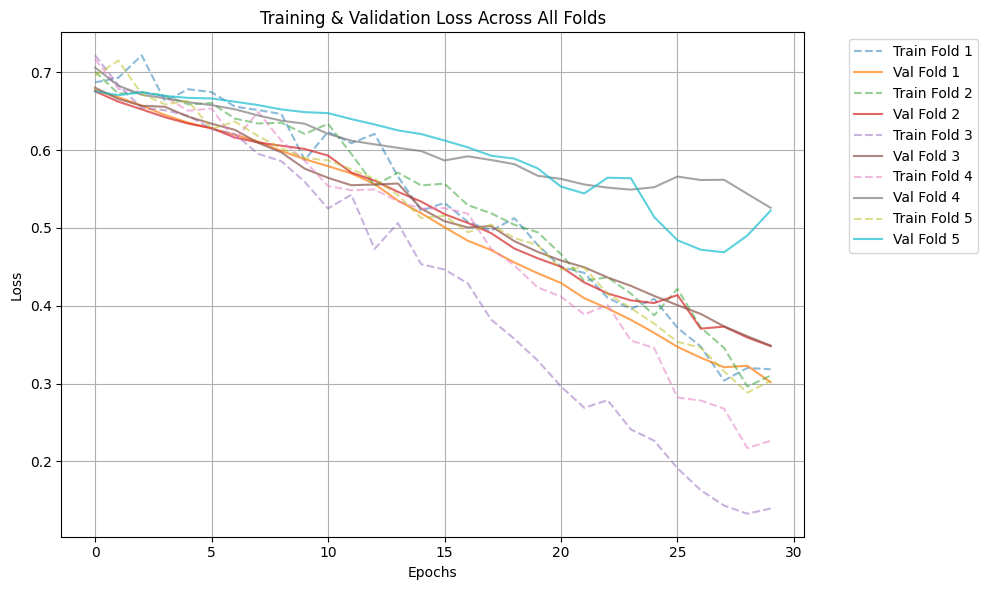

In [137]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

for i, hist in enumerate(history_per_fold):
    plt.plot(hist['loss'], alpha=0.5, linestyle='--', label=f'Train Fold {i+1}')
    plt.plot(hist['val_loss'], alpha=0.7, label=f'Val Fold {i+1}')

plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training & Validation Loss Across All Folds")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
print("Final Test Evaluation")

y_test_pred_prob = model.predict([X_img_test, X_tab_test])
y_test_pred = (y_test_pred_prob > 0.5).astype(int)

test_results = {
    "accuracy": accuracy_score(y_test, y_test_pred),
    "auc": roc_auc_score(y_test, y_test_pred_prob),
    "precision": precision_score(y_test, y_test_pred),
    "recall": recall_score(y_test, y_test_pred)
}

print(test_results)
